# Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

1. 'Daily Time Spent on Site': consumer time on site in minutes
2. 'Age': cutomer age in years
3. 'Area Income': Avg. Income of geographical area of consumer
4. 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
5. 'Ad Topic Line': Headline of the advertisement
6. 'City': City of consumer
7. 'Male': Whether or not consumer was male
8. 'Country': Country of consumer
9. 'Timestamp': Time at which consumer clicked on Ad or closed window
10. 'Clicked on Ad': 0 or 1 indicated clicking on Ad

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Optional Library
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Exploratory Data Analysis (EDA)

Text(0.5, 0, 'Age')

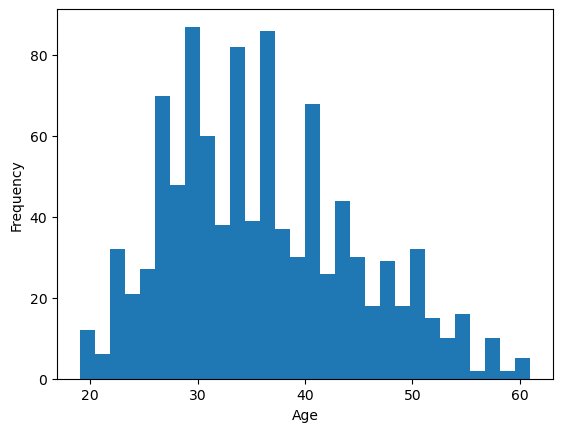

In [7]:
df['Age'].plot.hist(bins=30)
plt.xlabel('Age')

<AxesSubplot:xlabel='Age'>

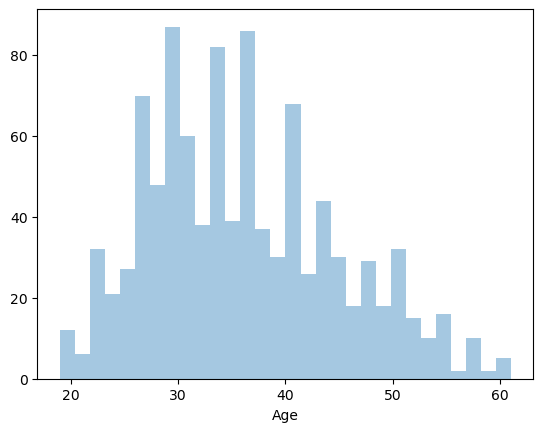

In [8]:
# OR You will use Seaborn for plotting above graph
sns.distplot(a=df['Age'],bins=30,kde=False)

Visual Relation between 'Age' and 'Daily Time Spent on Site'

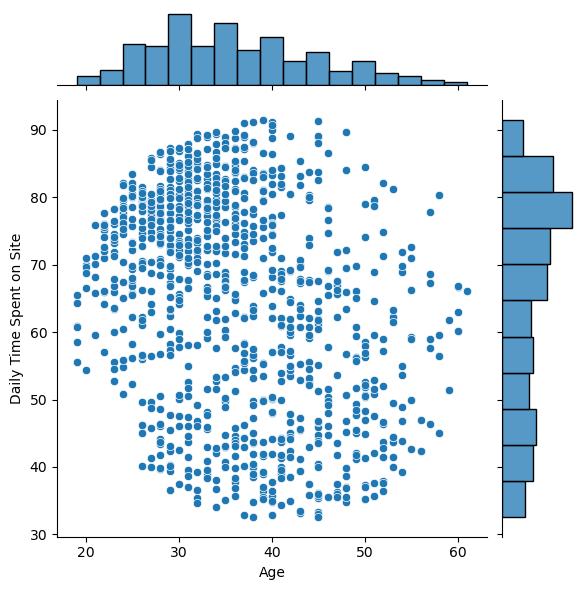

In [9]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,kind='scatter')

From above plot we will able to observe that between age 20 to 40, people will visit more on site.

'Age' vs 'Area of Income'

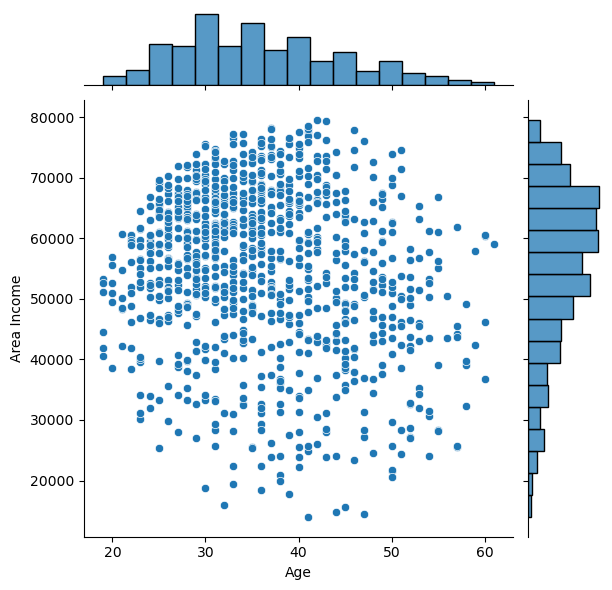

In [10]:
sns.jointplot(x='Age',y='Area Income',data=df)

From above plot, age between 20 to 42 (approx) people will has good income and it make sense bcz if we have good income then we shop online and able to purchase the item (visit on site and click on it).

'Daily Time Spent on Site' vs 'Daily Internet Usage'

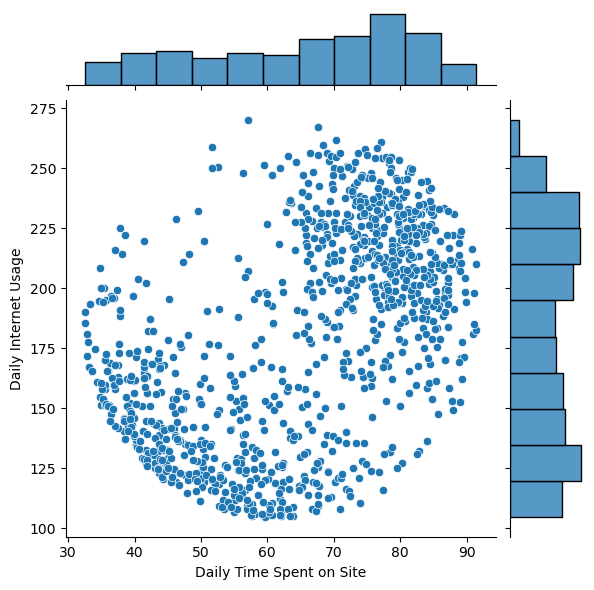

In [13]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df)

From above plot, as we able to see that data will split into two clusters like 'Lower triangle' and 'Upper triangle'.

Pairplot to observe whole features on the basis of 'Click on Site' (target variable) feature.

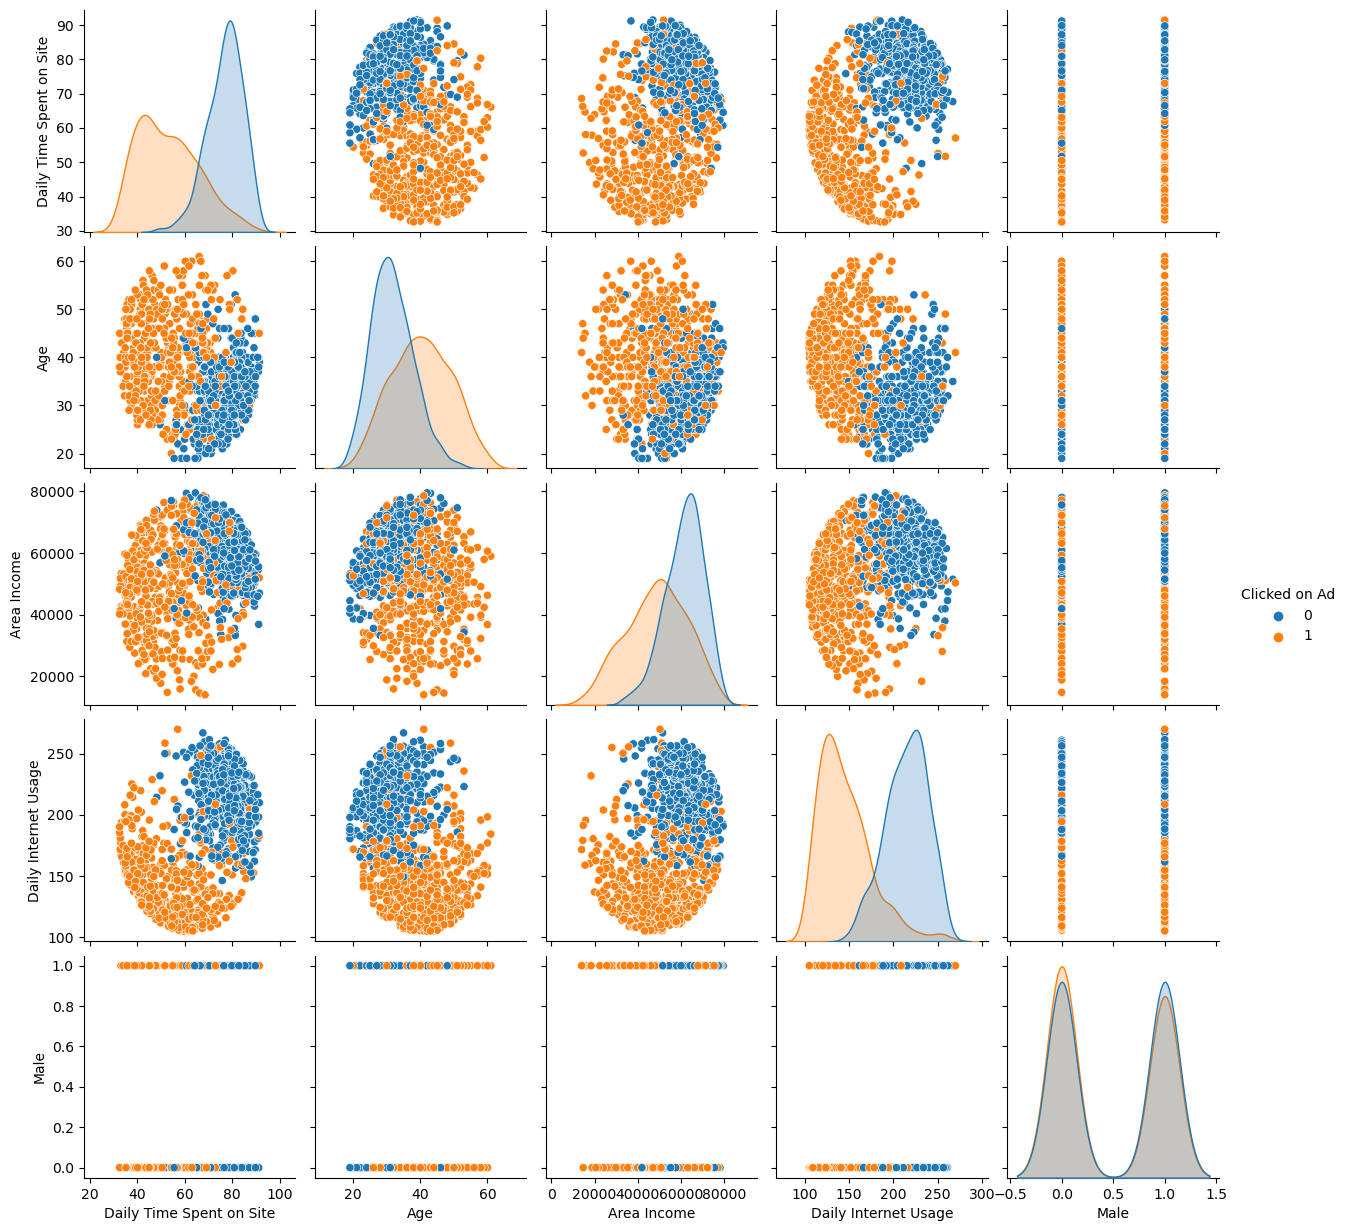

In [16]:
sns.pairplot(data=df,hue='Clicked on Ad')

# Removing Unnessesary Data Features

In [17]:
df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


So, In Logistic Regression we will counter mostly numeric data for better outcome or model accuracy. Therefore, we will remove (drop columns) data which is not use further.

Note:- It is totally optional and it's your choice you want to do it or not.* 

In [18]:
df.drop(['Ad Topic Line','City','Country','Timestamp'],inplace=True,axis=1)

In [19]:
df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.9,256.09,0,0


Now, Only numerical data columns is left in dataframe.

# Machine Learning Model

Split your data in train and test data.

In [20]:
X = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = df['Clicked on Ad'] #Target Variable

In [29]:
# X = df[df.drop('Clicked on Ad',axis=1)]

# Note:- You will assign 'X' like this(above one in same cell) also instead of write all columns one
# by one both will give the same output.

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
# Note: random_state is may be default. But, if you want that your output match with mine set same
#as above.

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((700, 5), (300, 5), (700,), (300,))

# Train and Test our Model

In [23]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

Hence, our model is trained and we move further for prediction purpose.

In [24]:
pred = log_model.predict(X_test)

In [25]:
pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

# Predictions

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [28]:
print(confusion_matrix(y_test,pred))

[[149   8]
 [ 14 129]]


# Conclusion

1. Our Model prediction is 0.93 or 93% which is pretty much good.
2. If you know the concept of confusion metric, then you will able to understand the 'confusion_matrix' prediction and That give us a good prediction where type errors is around (22) and accurate values is around (278).

Go through the project and try to do more EDA for better understand of data.

Be Happy and Keep Learning :)